In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
# Reading the dataset
cars = pd.read_csv("CarPrice_Assignment.csv")

In [52]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [53]:
#Summary of dataset
print(cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Exploration

In [54]:
#Remove the variable such as car_ID that straight away makes no sense, since it wont be adding any value in determining the price
cars = cars.drop(['car_ID'],axis=1)

##### To perform linear regression, we need to figure out on which feature the target variable depends on. We can a make a pair wise plot on numerical variables

In [55]:
cars.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [56]:
cars_num = cars.select_dtypes(include=['float64','int64'])

In [57]:
cars_num.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 1440x720 with 0 Axes>

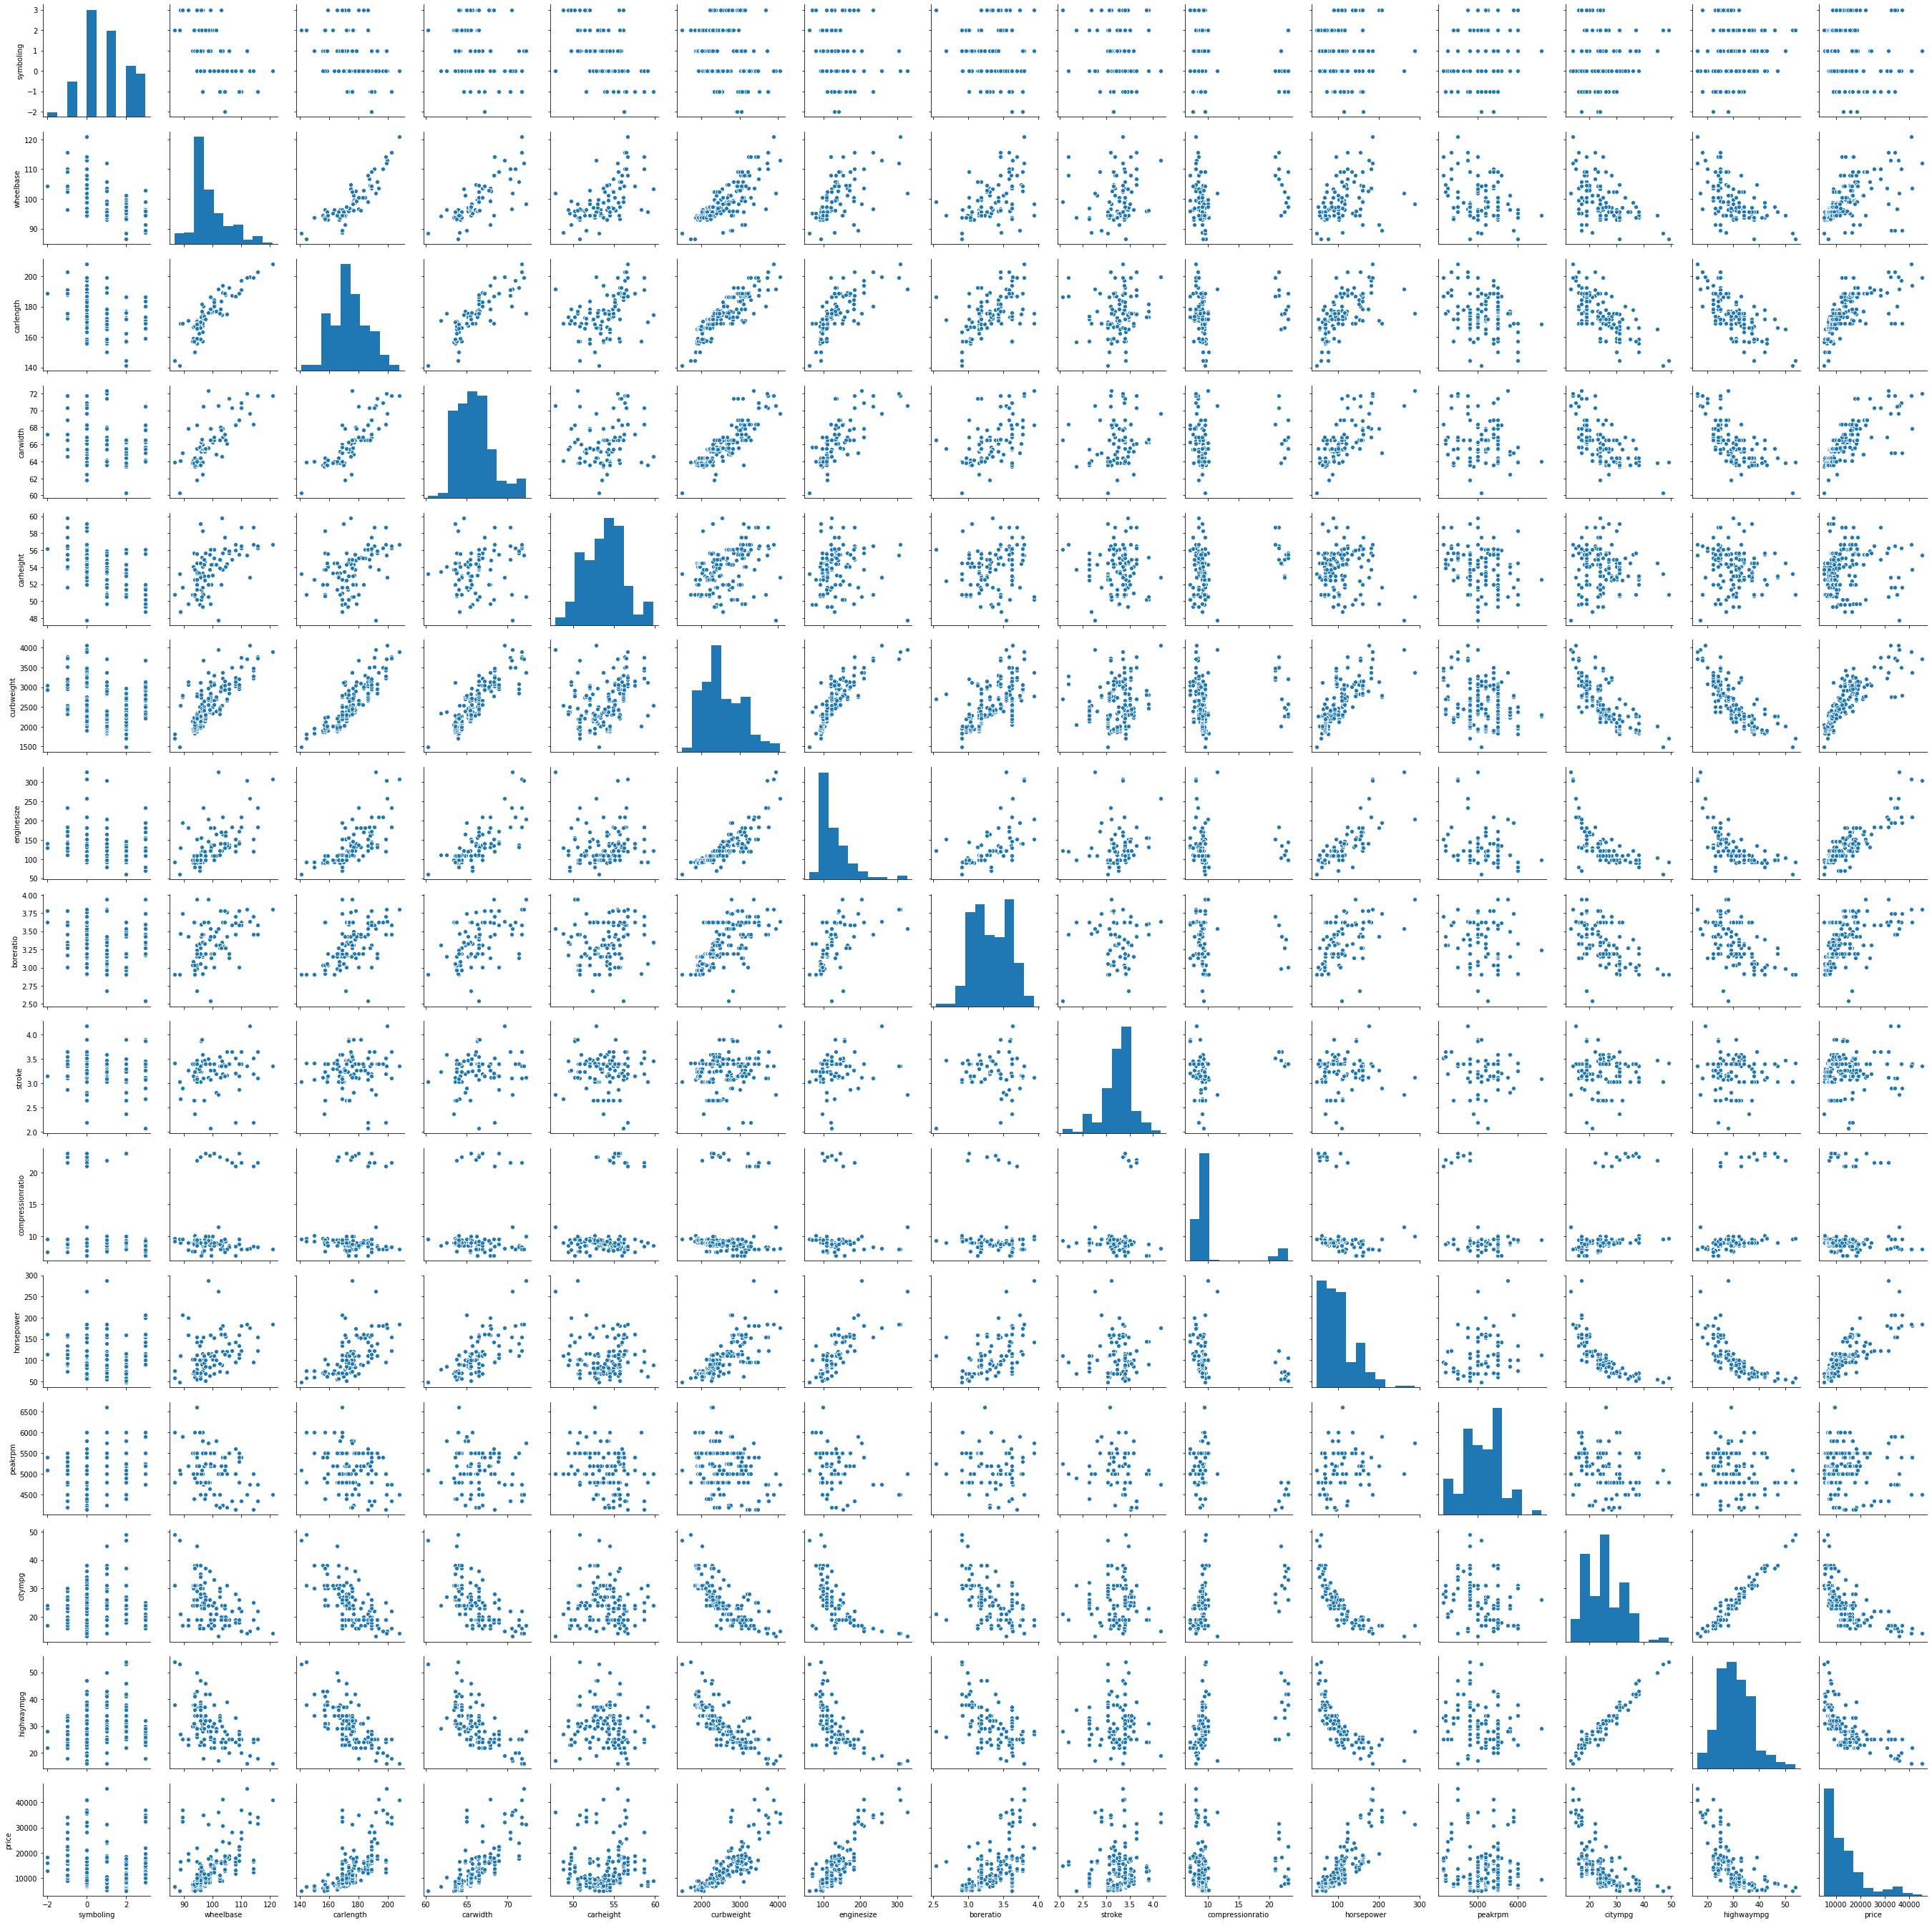

In [58]:
#pairplot
plt.figure(figsize=(20, 10))
sns.pairplot(cars_num)
plt.show()

#####  Very difficult to infer! Sometimes, when we have a lot of features, it is better to use correlation matrix or heatmap instead of pairplot. 

In [59]:
corMatrix = cars_num.corr()
corMatrix

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


##### or maybe lets plot the correlations on heatmap for better visualization!

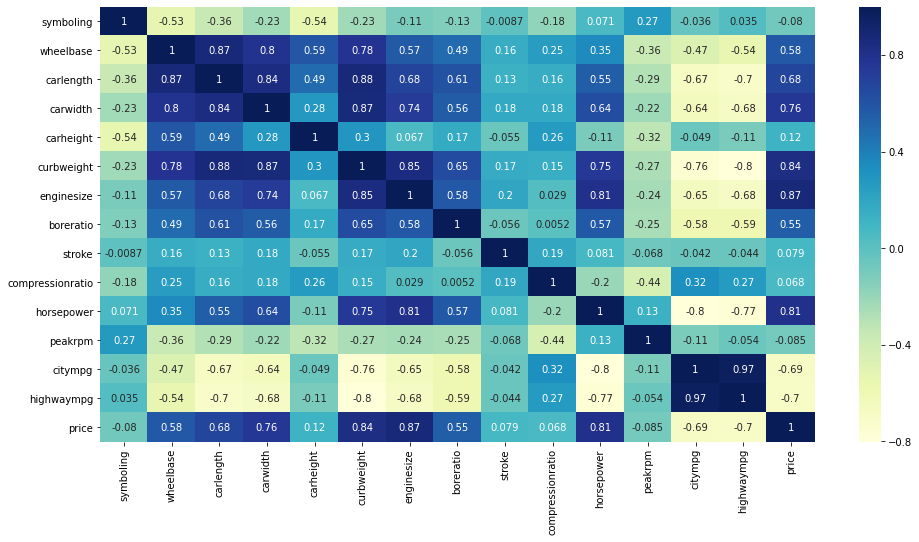

In [60]:
plt.figure(figsize=(16,8))
sns.heatmap(corMatrix, cmap="YlGnBu", annot=True)    #cmap = color map 
plt.show()

###### You can infer from the last row that how wheelbase, carlength, carwidth, curbweight, enginesize, horsepower are highly correlated with price, while, peakrpm, citympg, highwaympg are negatively correlated with price.

Also, there is a high correlation among the independent variables which leads to the problem of Multicollinearity. This always needs to be handled if its too severe.

### Data Cleaning

1. Instead of the car name, we can keep company names to reduce categories

In [61]:
cars['CarName']

0                alfa-romero giulia
1               alfa-romero stelvio
2          alfa-romero Quadrifoglio
3                       audi 100 ls
4                        audi 100ls
5                          audi fox
6                        audi 100ls
7                         audi 5000
8                         audi 4000
9               audi 5000s (diesel)
10                         bmw 320i
11                         bmw 320i
12                           bmw x1
13                           bmw x3
14                           bmw z4
15                           bmw x4
16                           bmw x5
17                           bmw x3
18                 chevrolet impala
19            chevrolet monte carlo
20              chevrolet vega 2300
21                    dodge rampage
22              dodge challenger se
23                       dodge d200
24                dodge monaco (sw)
25               dodge colt hardtop
26                  dodge colt (sw)
27             dodge coronet

In [62]:
cars['carCompany'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

In [63]:
cars['carCompany']

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
5             audi
6             audi
7             audi
8             audi
9             audi
10             bmw
11             bmw
12             bmw
13             bmw
14             bmw
15             bmw
16             bmw
17             bmw
18       chevrolet
19       chevrolet
20       chevrolet
21           dodge
22           dodge
23           dodge
24           dodge
25           dodge
26           dodge
27           dodge
28           dodge
29           dodge
          ...     
175         toyota
176         toyota
177         toyota
178         toyota
179         toyota
180         toyota
181        toyouta
182      vokswagen
183     volkswagen
184     volkswagen
185     volkswagen
186     volkswagen
187     volkswagen
188     volkswagen
189             vw
190             vw
191     volkswagen
192     volkswagen
193     volkswagen
194          volvo
195          volvo
196         

In [64]:
cars['carCompany'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
alfa-romero     3
jaguar          3
vw              2
maxda           2
renault         2
mercury         1
porcshce        1
toyouta         1
vokswagen       1
Nissan          1
Name: carCompany, dtype: int64

#### Few companies are misspelled! Lets correct them.

In [65]:
# volkswagen
cars.loc[(cars['carCompany'] == "vw") | (cars['carCompany'] == "vokswagen"), 'carCompany'] = 'volkswagen'

# porsche
cars.loc[cars['carCompany'] == "porcshce", 'carCompany'] = 'porsche'

# toyota
cars.loc[cars['carCompany'] == "toyouta", 'carCompany'] = 'toyota'

# nissan
cars.loc[cars['carCompany'] == "Nissan", 'carCompany'] = 'nissan'

# mazda
cars.loc[cars['carCompany'] == "maxda", 'carCompany'] = 'mazda'

In [66]:
cars['carCompany'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
subaru         12
volkswagen     12
volvo          11
peugeot        11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: carCompany, dtype: int64

#### Now that we have company names, lets drop carName column

In [67]:
cars=cars.drop('CarName', axis=1)

In [68]:
cars.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carCompany
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


#### There are 2 columns 'doornumber' and 'columnnumber' are numeric types which are mentioned as words. Lets change them into numeric data type.

In [69]:
cars['cylindernumber'].astype('category').value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [70]:
cars['doornumber'] = cars['doornumber'].map({'four':4,'two':2})
cars['cylindernumber'] = cars['cylindernumber'].map({'four':4,'two':2,'six':6,'five':5,'eight':8,'three':3,'twelve':12})


#### Now, lets focus on categorical variables. Models cant learn from so we need to make dummy variables to convert them into numeric types.

In [71]:
cars_category = cars.select_dtypes(include=['object'])
cars_category.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,carCompany
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [72]:
cars_dummy = pd.get_dummies(cars_category, drop_first=True)
cars_dummy.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Drop Categorical columns and add new dummies

In [73]:
cars = cars.drop(list(cars_category), axis=1)

In [74]:
cars = pd.concat([cars,cars_dummy], axis=1)

In [75]:
cars.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,0,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,0,0,0,0,0,0,0,0,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,0,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,0,0,0


### Now we have all features as numeric data types.

#### Before building a model lets scale all the numerical features that we had before. The categorical features dont need to be scaled.
But we can only scale the training set features and not the test set. Lets first split the dataset.

In [76]:
from sklearn.cross_validation import train_test_split
df_train, df_test = train_test_split(cars, train_size=0.7, test_size=0.3, random_state=100)

In [77]:
cars_num.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### Scaling

In [78]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_features = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price','doornumber','cylindernumber']     ##doornumber and cylindernumber are numeric types as well that were converted from object type
df_train[scale_features] = scale.fit_transform(df_train[scale_features])

In [79]:
df_train.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,carCompany_nissan,carCompany_peugeot,carCompany_plymouth,carCompany_porsche,carCompany_renault,carCompany_saab,carCompany_subaru,carCompany_toyota,carCompany_volkswagen,carCompany_volvo
122,0.170159,0.887412,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.351431,-0.660242,-1.297329,...,0,0,1,0,0,0,0,0,0,0
125,1.848278,-1.126872,-0.677177,-0.359789,1.114978,-1.382026,0.439415,-0.351431,0.637806,2.432256,...,0,0,0,1,0,0,0,0,0,0
166,0.170159,-1.126872,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.351431,-0.660242,-0.259197,...,0,0,0,0,0,0,0,1,0,0
1,1.848278,-1.126872,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,-0.351431,0.123485,0.625138,...,0,0,0,0,0,0,0,0,0,0
199,-1.507960,0.887412,0.972390,1.225364,0.616439,1.627983,1.137720,-0.351431,0.123485,1.201877,...,0,0,0,0,0,0,0,0,0,1


In [80]:
missingCol = cars.count().idxmin()
missingCol

'symboling'

In [81]:
linearmodel = LinearRegression()

In [82]:
# Split the train and test dataset into X and y

y_train = df_train.pop('price')
X_train = df_train

df_test[scale_features] = scale.fit_transform(df_test[scale_features])

y_test = df_test.pop('price')
X_test = df_test

In [83]:
linearmodel.fit(X_train,y_train)
predictions = linearmodel.predict(X_test)

In [103]:
# Comparison between predicted and actual values

df = pd.DataFrame()
df['y'] = y_test
df['pred'] = predictions
df.head()

,y,pred
160,-0.722601,-0.433695
186,-0.632141,-0.571018
59,-0.590316,-0.310631
165,-0.536184,-0.654174
140,-0.738733,-1.113426


In [85]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
R2 = r2_score(y_test, predictions)
print('R2:',R2,'RMSE:',RMSE)

R2: 0.8755104200054982 RMSE: 0.3528308093045472


### Feature Selection Techniques

### 1. Missing Value Ratio


In [86]:

(df_train.isnull().sum()/len(df_train)*100).nlargest()

symboling     0.0
doornumber    0.0
wheelbase     0.0
carlength     0.0
carwidth      0.0
dtype: float64

In [87]:
df_train.shape

(143, 59)

### 2. Variance Threshold


In [88]:
from sklearn.feature_selection import VarianceThreshold

In [89]:
selector = VarianceThreshold()
s = selector.fit_transform(df_train)
s.shape

(143, 56)

In [90]:
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [91]:
df_train.columns[selector.get_support()]

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'fueltype_gas', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginelocation_rear', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'carCompany_audi', 'carCompany_bmw', 'carCompany_buick',
       'carCompany_chevrolet', 'carCompany_dodge', 'carCompany_honda',
       'carCompany_isuzu', 'carCompany_jaguar', 'carCompany_mazda',
       'carCompany_mitsubishi', 'carCompany_nissan', 'carCompany_peugeot',
       'carCompany_plymouth', 'carCompany_porsche', 'carCompany_ren

### 3. Mutual Information


In [92]:
from sklearn.feature_selection import mutual_info_regression  
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_regression, k=10)
train = selector.fit_transform(X_train, y_train)

train.shape


(143, 10)

In [93]:
selector.get_support()

array([False, False,  True,  True,  True, False,  True, False,  True,
        True, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [94]:
selector.scores_

array([0.17744183, 0.01829886, 0.44596512, 0.55950572, 0.65288391,
       0.28614681, 0.89371124, 0.34512922, 0.86039327, 0.37752835,
       0.28527108, 0.11488372, 0.81426648, 0.12879894, 0.69829844,
       0.78266274, 0.03500991, 0.0930158 , 0.        , 0.11056953,
       0.03189651, 0.00483837, 0.31806663, 0.34610305, 0.        ,
       0.        , 0.04783347, 0.09349947, 0.00614677, 0.02702847,
       0.01318639, 0.3579158 , 0.        , 0.03500991, 0.        ,
       0.29703109, 0.00548567, 0.        , 0.06629712, 0.05537544,
       0.0759449 , 0.        , 0.03112205, 0.04770546, 0.00626217,
       0.        , 0.03344262, 0.        , 0.        , 0.01794399,
       0.05824125, 0.01531268, 0.        , 0.00228176, 0.        ,
       0.02173993, 0.02043005, 0.01694166, 0.05039701])

### 4. ANOVA


In [95]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

fvalue_selector = SelectKBest(f_regression, k=20)  #select features with 20 best ANOVA F-Values

X_kbest = fvalue_selector.fit_transform(X_train, y_train)
print(X_train.shape, X_kbest.shape)     #output (143, 59) (143, 20)
fvalue_selector.scores_

(143, 59) (143, 20)


array([2.41853568e+00, 8.17760733e-01, 8.92488456e+01, 1.46424930e+02,
       2.49591029e+02, 1.32900450e+00, 4.07216278e+02, 1.29868082e+02,
       4.30488900e+02, 5.61254695e+01, 3.37165041e+00, 3.74481769e+00,
       2.61777750e+02, 2.32742963e+00, 1.17557542e+02, 1.26999719e+02,
       5.34726161e+00, 6.28293679e+00, 1.14459248e+00, 9.60046639e+00,
       6.18663206e+00, 3.70197813e-01, 9.53714936e+01, 1.19415766e+02,
       7.60474907e+00, 5.74576385e+00, 2.76576605e-01, 1.36516309e+01,
       1.15104354e+00, 1.83650007e+01, 8.85695904e-05, 5.74118500e+01,
       4.14746885e-02, 5.34726161e+00,            nan, 5.22546138e+01,
       7.60421383e-01,            nan, 2.47916590e+00, 2.26162670e+01,
       3.33330742e+01, 2.52519200e+00, 3.97933869e+00, 4.32352553e+00,
       1.18431111e+00, 2.77261466e+01, 1.59250375e+00,            nan,
       2.58148828e+00, 2.29080354e+00, 8.55900572e-01, 2.40135400e+00,
       1.42330841e+01, 3.97023983e-01, 2.57783274e-01, 3.91540919e+00,
      

### 5. Sequential Feature Selection


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(LinearRegression(), 
           k_features=10, 
           forward=True, 
           floating=False,
           scoring='accuracy',
           cv=2)

sfs = sfs.fit(X_train, y_train)

selected_features = x_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

# print the selected features.
selected_features = x_train.columns[list(sfs.k_feature_idx_)]
print(selected_features)

# print the final prediction score.
print(sfs.k_score_)

# transform to the newly selected features.
x_train_new = sfs.transform(X_train)


### 6. Recursive Feature Elimination


In [97]:
# Import RFE
from sklearn.feature_selection import RFE
# RFE with 20 features
lm = LinearRegression()
rfe1 = RFE(lm, 5)

# Fit with 15 features
X_train_new = rfe1.fit_transform(X_train, y_train)
X_test_new = rfe1.transform(X_test)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_) 

[False False False False False False False False  True False False False
 False False False False False False False False False False False False
  True False False False False False  True False False False False False
 False False False  True False False False False False False False False
 False False False False False  True False False False False False]
[51 49 38 41  6 36 27 42  1 28 43  9 33 34 47 40  8 26 24 22 23 25 45 50
  1 32  4 30  3 52  1 46 20  7 53 37 29 54 19  1 44 18 16 14 35 39 11 55
 10 12  5 17 21  1 31  2 13 15 48]


In [98]:
lm.fit(X_train_new, y_train)
predictions_rfe = lm.predict(X_test_new)
RMSE = np.sqrt(mean_squared_error(y_test, predictions_rfe))
RMSE

0.3818790640970477

### 7. LASSO Regression 


In [99]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso= Lasso()
parameters = {'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3,1e-2,1,3,5]}
lasso_model = GridSearchCV(lasso, parameters, scoring = 'r2',cv=5) 
lasso_model.fit(X_train,y_train)  
pred = lasso_model.predict(X_test)
print(lasso_model.best_params_)
print(lasso_model.best_score_)

{'alpha': 0.001}
0.8630550401365724


In [104]:
df = pd.DataFrame()
df['y'] = y_test
df['pred'] = pred
df.head()

,y,pred
160,-0.722601,-0.739213
186,-0.632141,-0.513746
59,-0.590316,-0.396314
165,-0.536184,-0.589226
140,-0.738733,-0.945926


### 8. Tree Model Feature Selection


In [101]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
impList = zip(X_train.columns, importance)
for feature in sorted(impList, key = lambda t: t[1], reverse=True):
    print(feature)

('enginesize', 0.6339021892047284)
('curbweight', 0.23613757658957388)
('horsepower', 0.03544675251702801)
('carwidth', 0.027897961791421965)
('stroke', 0.013216188428686064)
('cylindernumber', 0.011750282673996335)
('carlength', 0.008588893306955748)
('wheelbase', 0.006295903961957301)
('carCompany_bmw', 0.005246716927735504)
('enginetype_ohc', 0.004555075553065931)
('highwaympg', 0.0034574803441821175)
('carheight', 0.002610899740834186)
('carbody_hatchback', 0.002241806910216168)
('symboling', 0.0016198694664423144)
('drivewheel_rwd', 0.0014303287385102577)
('compressionratio', 0.0013739954539399948)
('citympg', 0.0013075739825735694)
('carbody_sedan', 0.0010370568258208724)
('carCompany_peugeot', 0.0006403757466005355)
('carbody_wagon', 0.0004261395247443003)
('carCompany_chevrolet', 0.00026083659151246035)
('aspiration_turbo', 0.00018485594977649244)
('doornumber', 0.00010681060039798808)
('carCompany_mitsubishi', 0.00010470203472816002)
('peakrpm', 7.812071979080394e-05)
('borera